In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
def plot_grayscale_image(image, title=None): 
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

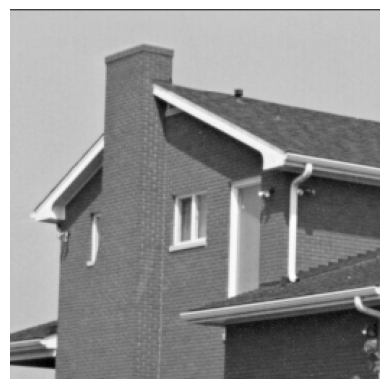

In [7]:
image_path = "../images/house.tiff"
image = cv2.imread(image_path)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_grayscale_image(imgray)

### Laplacian and Sobel

In [8]:
help(cv2.Laplacian)

Help on built-in function Laplacian:

Laplacian(...)
    Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the Laplacian of an image.
    .
    .   The function calculates the Laplacian of the source image by adding up the second x and y
    .   derivatives calculated using the Sobel operator:
    .
    .   \f[\texttt{dst} =  \Delta \texttt{src} =  \frac{\partial^2 \texttt{src}}{\partial x^2} +  \frac{\partial^2 \texttt{src}}{\partial y^2}\f]
    .
    .   This is done when `ksize > 1`. When `ksize == 1`, the Laplacian is computed by filtering the image
    .   with the following \f$3 \times 3\f$ aperture:
    .
    .   \f[\vecthreethree {0}{1}{0}{1}{-4}{1}{0}{1}{0}\f]
    .
    .   @param src Source image.
    .   @param dst Destination image of the same size and the same number of channels as src .
    .   @param ddepth Desired depth of the destination image, see @ref filter_depths "combinations".
    .   @param ksize Aperture siz

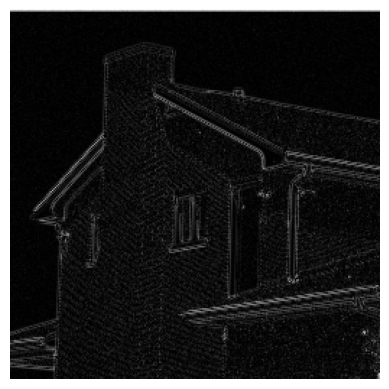

In [9]:
lap = cv2.Laplacian(src=imgray, ddepth=cv2.CV_64F)  # Use laplacian method to compute gradient: (ddepth: data type for the output)
lap = np.uint8(np.absolute(lap))  # Take absolute value of the gradient and convert it to 8-bit integer (keep all edges)
plot_grayscale_image(lap)

In [10]:
help(cv2.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .
    .   for the x-derivative, or transposed for the y-derivative.
    .
    .   The 

In [11]:
sobelX = cv2.Sobel(src=imgray, ddepth=cv2.CV_64F, dx=1, dy=0)  # find horizontal like edges
sobelY = cv2.Sobel(src=imgray, ddepth=cv2.CV_64F, dx=0, dy=1)  # find vertical like edges

# absolute value and convert to 8-bit dtype
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(src1=sobelX, src2=sobelY)

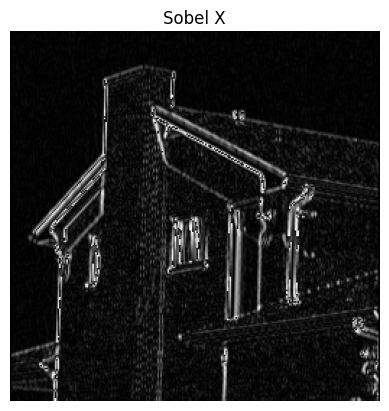

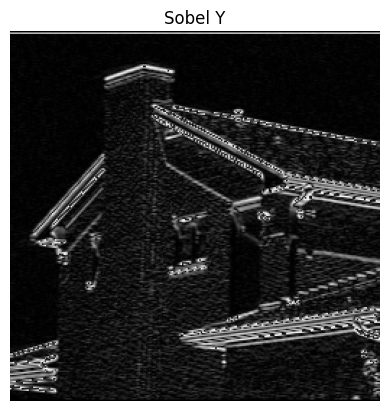

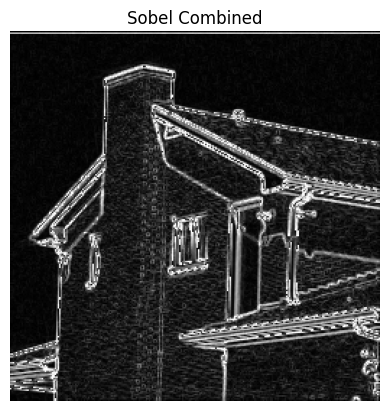

In [12]:
plot_grayscale_image(sobelX, title="Sobel X")
plot_grayscale_image(sobelY, title="Sobel Y")
plot_grayscale_image(sobelCombined, title="Sobel Combined")

### Canny Edge Detection

The Canny edge detector is a multi-step process. It involves
blurring the image to remove noise, computing Sobel gradient images in the x and y direction, suppressing edges, and
finally a hysteresis thresholding stage that determines if a
pixel is “edge-like” or not.

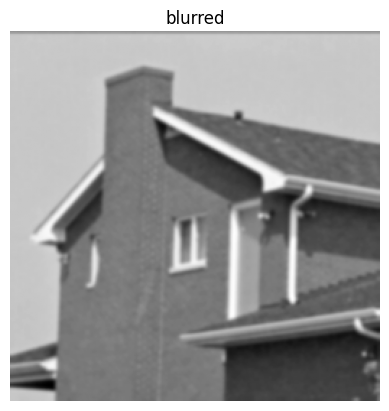

In [14]:
blurred = cv2.GaussianBlur(imgray, (5, 5), 0)
plot_grayscale_image(blurred, "blurred")

In [15]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \f$L_2\

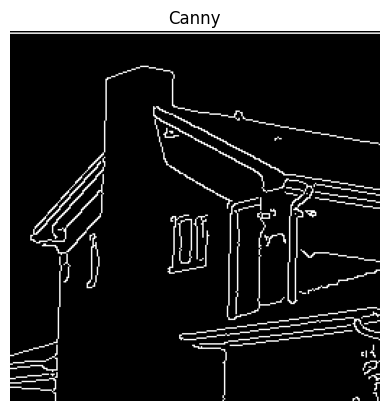

In [ ]:
canny = cv2.Canny(image=blurred, threshold1=30, threshold2=100)  # Any gradient value below th1 is an edge, other wise isn't an edge
plot_grayscale_image(canny, "Canny")